<h1 style="text-align: center;">Predicting Hotel Booking Cancellations: A Strategic Approach to Improve Operations and Revenue</h1>
<h3 style="text-align: center;">By : Melin Ayu Safitri</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**<br>

A hotel wants to prepare rooms for its potential customers. Based on the available records, the hotel aims to identify which customers will actually stay and which ones will cancel their bookings.

Target:

0: Booking not canceled<br>
1: Booking canceled

**1.2 Problem Statements**<br>

The hotel struggles with managing cancellations, which results in several challenges:

- **Financial Losses:** Rooms that could have been sold remain unoccupied due to cancellations, leading to revenue loss.
- **Operational Inefficiencies:** It is difficult to plan resources such as staff and room availability when cancellations happen unpredictably.
- **Resource Allocation Challenges:** The hotel faces issues like overbooking or under-staffing, negatively affecting customer satisfaction and operational efficiency.

To address these problems, the hotel needs a system that can help predict which bookings are most likely to be canceled. By anticipating cancellations, the hotel can optimize its operations, reduce costs, and improve customer satisfaction.

**1.3 Goals**<br>

Based on the challenges identified, the hotel aims to achieve the following objectives:

- **Reduce the Impact of Cancellations:** By understanding the factors leading to cancellations, the hotel can take actions to minimize financial losses and improve operational efficiency.
- **Optimize Resource Planning:** Predicting cancellations will allow the hotel to better plan for staff allocation and room availability, reducing issues like overbooking and ensuring sufficient resources.
- **Identify Key Cancellation Factors:** The hotel wants to understand which factors, such as previous cancellations, booking changes, or special requests, are most strongly associated with cancellations. This will allow the hotel to make data-driven decisions for tailoring policies to reduce cancellations.

**1.4 Analytical Approach**<br>

We will analyze the data to uncover patterns that differentiate canceled bookings from non-canceled ones.

Then, we will build a classification model to predict the probability of booking cancellations, which will help the hotel make more proactive decisions.

This model will also provide insights into the features or factors that most influence the risk of cancellation, enabling the hotel to formulate more targeted strategies.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**<br>

- **Business Metric**
    - ***Cancellation Rate :*** Measures the percentage of bookings that were canceled out of total bookings.<br>
        **Relevance:** Understanding the cancellation rate helps hotels mitigate the financial impact of cancellations.

- **Machine Learning Evaluation Metric**
    - ***Type 1 Error (False Positive):*** Classifying a booking that is not canceled as canceled.

        Consequence: Unnecessary precautionary actions, such as overbooking or allocating excess resources (e.g., more staff than needed), which can negatively affect customer experience and increase operational costs.

    - ***Type 2 Error (False Negative):*** Classifying a booking that is canceled as not canceled.

        Consequence: Loss of revenue due to rooms that remain unoccupied and cannot be rebooked, leading to financial losses for the hotel.

    Based on the consequences of both types of errors, the hotel aims to reduce financial losses caused by false negatives (cancellations that the model fails to detect), while avoiding unnecessary actions that arise from false positives (e.g., overbooking or excessive staffing).

    Therefore, the model should aim to minimize type 1 errors (false positives) as much as possible, since these can lead to unnecessary costs without improving customer satisfaction.

    Key Metric:

    ROC-AUC will be the primary metric used because it provides a more holistic view of model performance across different thresholds and helps the hotel avoid both types of errors, particularly false positives. A good model is one that minimizes false positives while capturing as many false negatives as possible, to maximize revenue and customer satisfaction.


**1.6 Success Criteria**<br>
- ***Reduction in Cancellations:*** The Cancellation Rate should decrease by 10-15% within a specific period after implementing strategies based on the model's predictions.
- ***Goal:*** The hotel should be able to reduce cancellations, leading to a more stable revenue stream and better resource planning.

- ***Relevance:*** A high ROC-AUC score indicates that the model is effectively distinguishing between canceled and non-canceled bookings, leading to more accurate predictions.
- ***Goal:*** The model should achieve an ROC-AUC score ≥ 0.80.

## **Section 2. Data Understanding**

In [2]:
# import library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

**2.1 General Information**


|No | Feature | Data Type | Description|
|---|---------| --------- | -----------|
|1.|country | object | Country of origin|
|2.|market_segment | object | Market segment designation|
|3.|previous_cancellations | int64 | Number of previous bookings that were cancelled by the customer prior to the current booking|
|4.|booking_changes | int64 | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation|
|5.|deposit_type | object | Indication on if the customer made a deposit to guarantee the booking|
|6.|days_in_waiting_list | int64 | Number of days the booking was in the waiting list before it was confirmed to the customer|
|7.|customer_type | object | Type of booking|
|8.|reserved_room_type | object | Code of room type reserved. Code is presented instead of designation for anonymity reasons|
|9.|required_car_parking_space | int64 | Number of car parking spaces required by the customer|
|10.|total_of_special_request | int64 | Number of special requests made by the customer (e.g. twin bed or high floor)|
|11.|is_canceled | int64 | Value indicating if the booking was canceled (1) or not (0)|


**2.2 Feature Information**

|No.| Feature | Impact to Business |
|---|---------| ------------------ |
| 1. | country |Helps in targeting specific geographic markets with tailored marketing strategies, optimizing regional demand.|
| 2. | market_segment |Enables price optimization and cost control by understanding the distribution of bookings across different segments.|
| 3. | previous_cancellations |High cancellation rates could signal a need for better booking policies or incentives to reduce lost revenue.|
| 4. | booking_changes|Frequent changes to bookings can create operational inefficiencies, leading to higher labor costs and potential customer dissatisfaction.|
| 5. | deposit_type |Non-refundable deposits secure revenue and reduce cancellations, while refundable deposits may lead to more flexibility and customer trust.|
| 6. | days_in_waiting_list|Long waiting times can decrease customer satisfaction, leading to potential lost bookings if not addressed.|
| 7. | customer_type|Identifying customer types allows for tailored pricing and booking management strategies.|
| 8. | reserved_room_type|Accurate room type reservations ensure customer satisfaction and prevent issues with overbooking or mismatch between expectations and actual offerings.|
| 9. | required_car_parking_space|Understanding parking demand ensures sufficient availability for guests, preventing dissatisfaction from inadequate facilities.|
| 10.| total_of_special_request|Managing special requests enhances guest satisfaction but may increase operational complexity and costs.|
| 11.| is_canceled|Tracking cancellations allows for better revenue forecasting and aids in adjusting booking policies to minimize revenue loss.|


**2.3 Statistics Summary**

In [3]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Documents\Hotel-Booking-Demand-Project\data\raw\data_hotel_booking_demand.csv')
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [5]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [6]:
df.describe(include='object')

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [7]:
# Data Cleaning - Identify Missing Values
df.isnull().sum().apply(lambda x: f'{x} = ({x/len(df):.2%})')

country                        351 = (0.42%)
market_segment                   0 = (0.00%)
previous_cancellations           0 = (0.00%)
booking_changes                  0 = (0.00%)
deposit_type                     0 = (0.00%)
days_in_waiting_list             0 = (0.00%)
customer_type                    0 = (0.00%)
reserved_room_type               0 = (0.00%)
required_car_parking_spaces      0 = (0.00%)
total_of_special_requests        0 = (0.00%)
is_canceled                      0 = (0.00%)
dtype: object

In [8]:
# Handling Missing Values
df = df.dropna()

In [9]:
# Confirm the adjustments by checking for any remaining missing values.
df[["country"]].isna().sum().reset_index().rename(columns={"index": "column", 0: "missing values"})

,column,missing values
0,country,0


**3.2 Duplicated Values**

In [10]:
# Data Cleaning - Identify Data Duplicated
print('Total Duplicated Rows: ', df.duplicated().sum())

Total Duplicated Rows:  73138


In [11]:
df[df.duplicated()]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
7,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
22,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
29,PRT,Online TA,0,0,No Deposit,0,Transient,A,0,1,0
34,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
44,PRT,Groups,0,0,Non Refund,0,Transient,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [12]:
df[(df['country'] == 'PRT') & (df['customer_type'] == 'Contract') & (df['deposit_type'] == 'No Deposit') & (df['market_segment'] == 'Groups')]

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
151,PRT,Groups,1,0,No Deposit,0,Contract,A,0,0,1
189,PRT,Groups,1,0,No Deposit,0,Contract,A,0,0,1
2450,PRT,Groups,1,0,No Deposit,0,Contract,A,0,0,1
3060,PRT,Groups,1,0,No Deposit,0,Contract,A,0,0,1
3626,PRT,Groups,1,0,No Deposit,0,Contract,A,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
80541,PRT,Groups,1,0,No Deposit,0,Contract,A,0,0,1
82066,PRT,Groups,1,0,No Deposit,0,Contract,A,0,0,1
82790,PRT,Groups,1,0,No Deposit,0,Contract,A,0,0,1
83099,PRT,Groups,1,0,No Deposit,0,Contract,A,0,0,1


In [13]:
# Handling Data Duplicated
df.drop_duplicates(inplace=True)

In [14]:
# Verifying duplicates, since each listing should have a distinct identifier
df.duplicated().sum()

np.int64(0)

**3.3 Identify Spelling Errors**

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)
- Check Cardinality (Categorical Variable)

In [15]:
df.columns

Index(['country', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10084 entries, 0 to 83565
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      10084 non-null  object
 1   market_segment               10084 non-null  object
 2   previous_cancellations       10084 non-null  int64 
 3   booking_changes              10084 non-null  int64 
 4   deposit_type                 10084 non-null  object
 5   days_in_waiting_list         10084 non-null  int64 
 6   customer_type                10084 non-null  object
 7   reserved_room_type           10084 non-null  object
 8   required_car_parking_spaces  10084 non-null  int64 
 9   total_of_special_requests    10084 non-null  int64 
 10  is_canceled                  10084 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 945.4+ KB


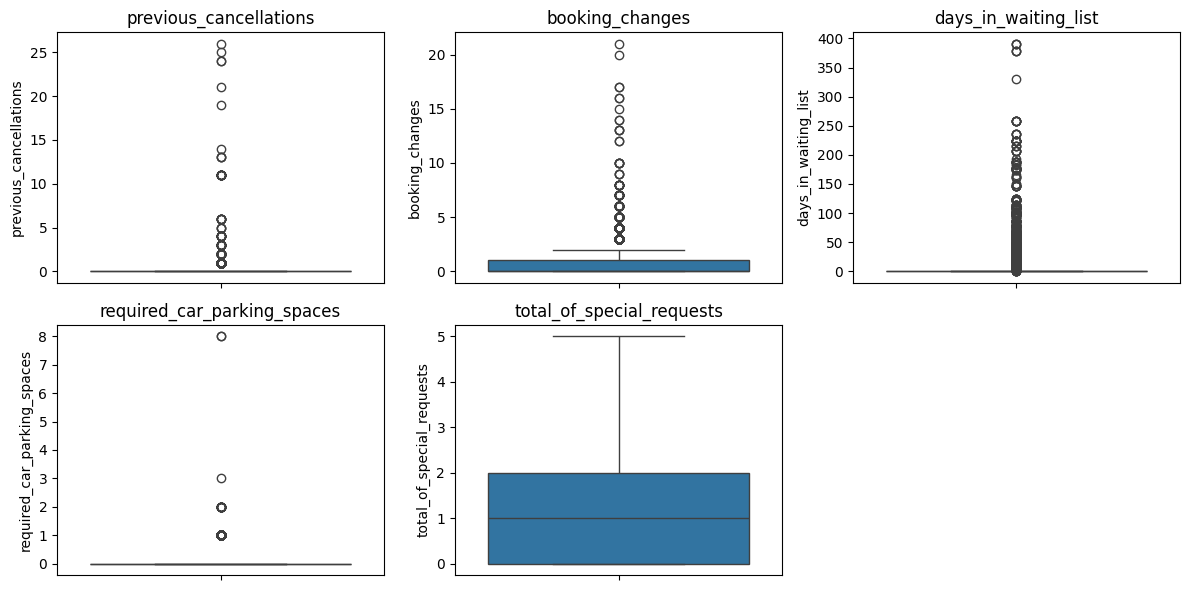

In [17]:
# Data Cleaning - Identify Numeric Distribution
num_features=df.drop(['country','market_segment','deposit_type','customer_type',
                      'reserved_room_type', 'is_canceled'],axis=1)

plt.figure(figsize=(12,6))
for idx,feature in enumerate(num_features.columns, start=1):
    sns.boxplot(df[feature], ax=plt.subplot(2,3,idx))
    plt.subplot(2,3,idx).set_title(feature)
plt.tight_layout()
plt.show()

In [18]:
# Data Cleaning - Identify Categorical Distribution
cat_features=df[['country','market_segment','deposit_type','customer_type',
                 'reserved_room_type']]

for feature in cat_features.columns:
    print (f'total unique values({feature}): {df[feature].nunique()}')
    print(df[feature].value_counts(normalize=True))
    print("")

total unique values(country): 162
country
PRT    0.197640
GBR    0.072789
ESP    0.063566
FRA    0.060690
DEU    0.042840
         ...   
DMA    0.000099
KIR    0.000099
MYT    0.000099
KNA    0.000099
AIA    0.000099
Name: proportion, Length: 162, dtype: float64

total unique values(market_segment): 8
market_segment
Online TA        0.488298
Direct           0.206168
Offline TA/TO    0.145676
Groups           0.083796
Corporate        0.050079
Complementary    0.017850
Aviation         0.008033
Undefined        0.000099
Name: proportion, dtype: float64

total unique values(deposit_type): 3
deposit_type
No Deposit    0.976101
Non Refund    0.019238
Refundable    0.004661
Name: proportion, dtype: float64

total unique values(customer_type): 4
customer_type
Transient          0.675625
Transient-Party    0.252777
Contract           0.047699
Group              0.023899
Name: proportion, dtype: float64

total unique values(reserved_room_type): 10
reserved_room_type
A    0.452400
D    0.2008

In [19]:
# Data Cleaning - Identify Target Distribution
df['is_canceled'].value_counts().apply(lambda x: f'{x} = {(x/len(df)):.1%}')

is_canceled
0    7688 = 76.2%
1    2396 = 23.8%
Name: count, dtype: object

**Insight :** Data Imbalanced

## **Section 4. Data Generation**

In [20]:
from sklearn.model_selection import train_test_split

**4.1 Constructing `Seen` and `Unseen` Data**

In [21]:
df_seen, df_unseen = train_test_split(df, test_size=0.2, random_state=42)   

**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

In [22]:
feature_seen = df_seen.drop('is_canceled', axis=1)
target_seen = df_seen['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(feature_seen, target_seen, test_size=0.2,
                                                    random_state=42, stratify=target_seen)
print(X_train.shape)
print(y_train.shape)

(6453, 10)
(6453,)


## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Check Correlation**

In [23]:
df.corr(numeric_only=True)

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
previous_cancellations,1.000000,-0.045371,-0.005290,-0.021662,-0.018281,0.076669
booking_changes,-0.045371,1.000000,-0.030736,-0.012733,-0.016031,-0.072826
days_in_waiting_list,-0.005290,-0.030736,1.000000,-0.054320,-0.120820,0.032189
required_car_parking_spaces,-0.021662,-0.012733,-0.054320,1.000000,0.029712,-0.235222
total_of_special_requests,-0.018281,-0.016031,-0.120820,0.029712,1.000000,-0.073202
is_canceled,0.076669,-0.072826,0.032189,-0.235222,-0.073202,1.000000


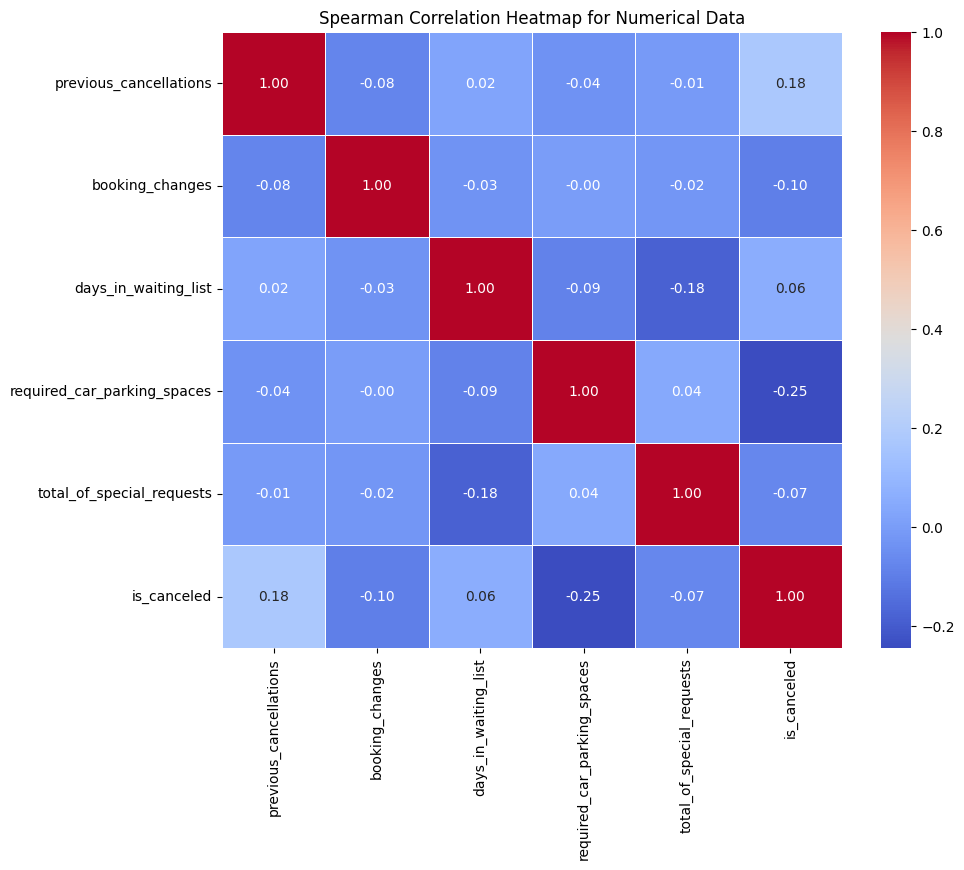

In [24]:
# Filter for numerical columns
numerical_data = df.select_dtypes(include=['number'])

# Calculate the Spearman correlation matrix
correlation_matrix = numerical_data.corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Heatmap for Numerical Data')
plt.show()

**5.2 Outlier Analysis**

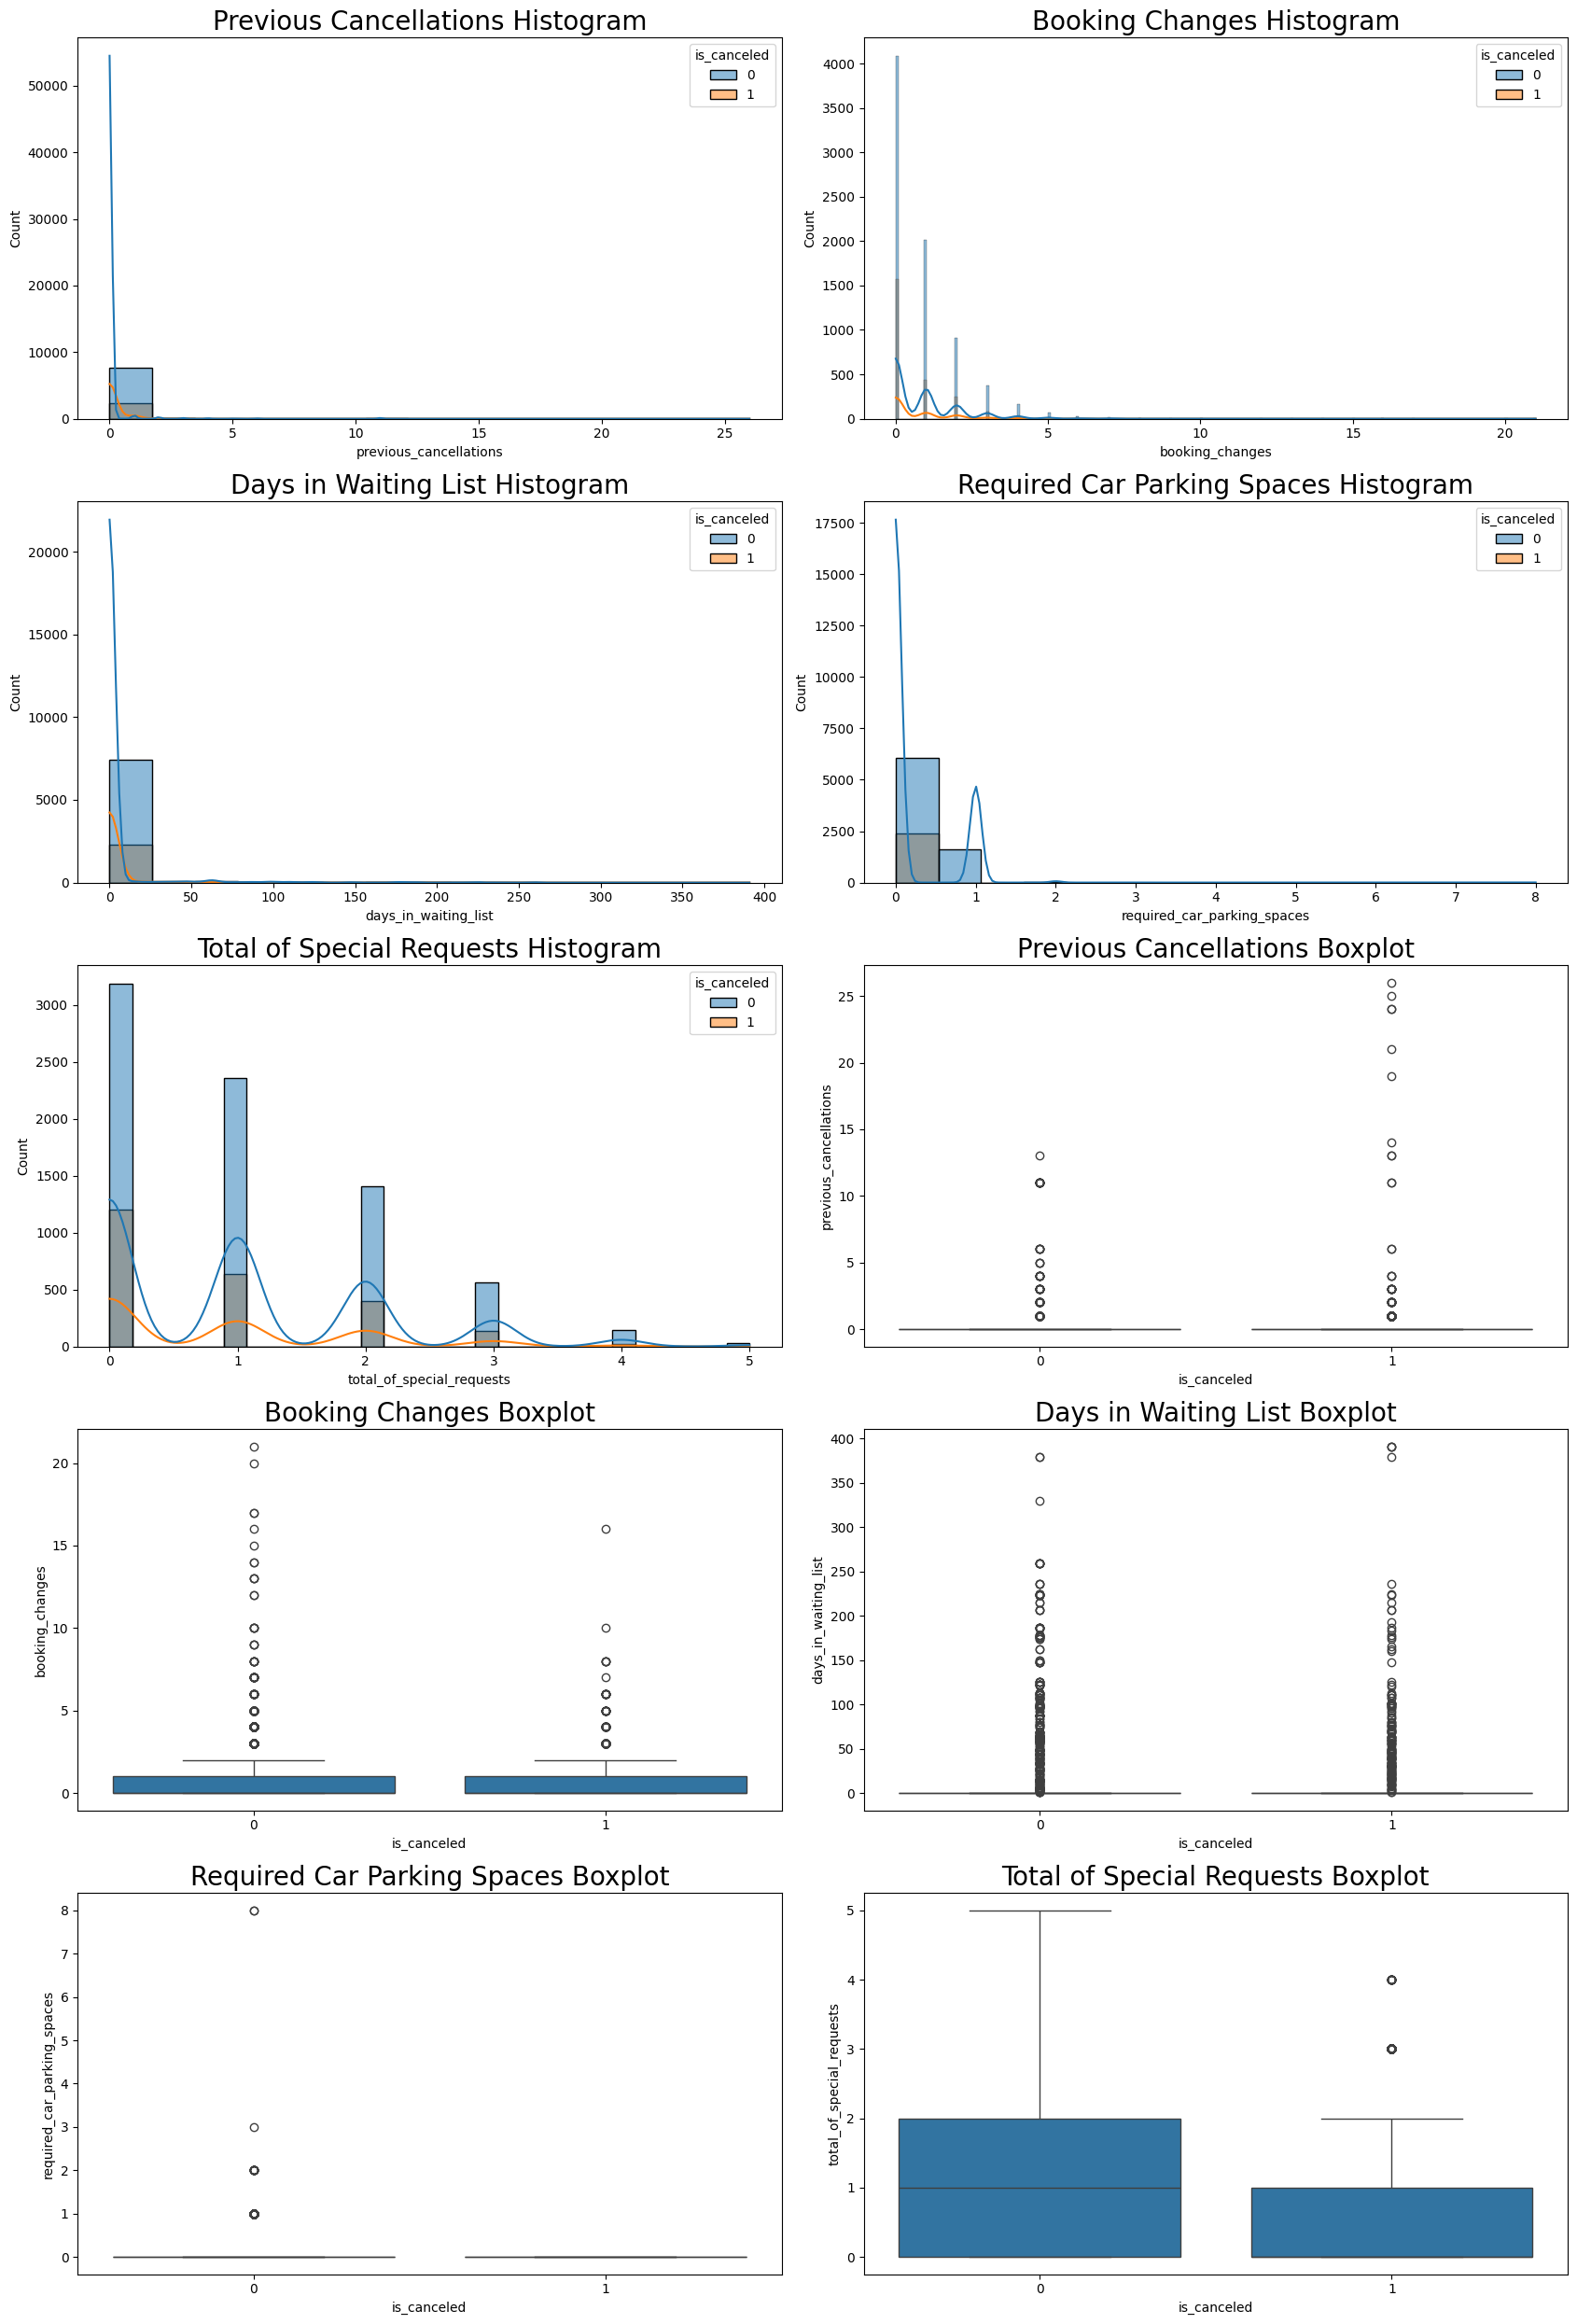

In [25]:
# Define a larger figure for multiple subplots
fig, axes = plt.subplots(5, 2, figsize=(17, 25))  

# Histogram 1
sns.histplot(data=df, x='previous_cancellations', hue='is_canceled', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Previous Cancellations Histogram', fontsize=20)

# Histogram 2
sns.histplot(data=df, x='booking_changes', hue='is_canceled', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Booking Changes Histogram', fontsize=20)

# Histogram 3
sns.histplot(data=df, x='days_in_waiting_list', hue='is_canceled', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Days in Waiting List Histogram', fontsize=20)

# Histogram 4
sns.histplot(data=df, x='required_car_parking_spaces', hue='is_canceled', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Required Car Parking Spaces Histogram', fontsize=20)

# Histogram 5
sns.histplot(data=df, x='total_of_special_requests', hue='is_canceled', kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Total of Special Requests Histogram', fontsize=20)

# Boxplot 1
sns.boxplot(data=df, y='previous_cancellations', x='is_canceled', ax=axes[2, 1])
axes[2, 1].set_title('Previous Cancellations Boxplot', fontsize=20)

# Boxplot 2
sns.boxplot(data=df, y='booking_changes', x='is_canceled', ax=axes[3, 0])
axes[3, 0].set_title('Booking Changes Boxplot', fontsize=20)

# Boxplot 3
sns.boxplot(data=df, y='days_in_waiting_list', x='is_canceled', ax=axes[3, 1])
axes[3, 1].set_title('Days in Waiting List Boxplot', fontsize=20)

# Boxplot 4
sns.boxplot(data=df, y='required_car_parking_spaces', x='is_canceled', ax=axes[4, 0])
axes[4, 0].set_title('Required Car Parking Spaces Boxplot', fontsize=20)

# Boxplot 5
sns.boxplot(data=df, y='total_of_special_requests', x='is_canceled', ax=axes[4, 1])
axes[4, 1].set_title('Total of Special Requests Boxplot', fontsize=20)

# Adjust layout
plt.tight_layout()
plt.show()

**Insight :**<br>

***Previous Cancellations:***
- Customers with a history of previous cancellations (previous_cancellations) are more likely to cancel their reservations compared to those without any prior cancellations.

***Booking Changes:***
- Customers with frequent booking changes (booking_changes) have a higher tendency to cancel their reservations compared to those who rarely make changes.

***Days in Waiting List:***
- The distribution of waiting list days (days_in_waiting_list) appears similar between customers who canceled and those who did not, suggesting that this variable does not significantly influence cancellation decisions.

***Required Car Parking Spaces:***
- The distribution of required parking spaces (required_car_parking_spaces) looks similar between customers who canceled and those who did not, indicating that this variable does not have a significant impact on reservation cancellations.

***Total of Special Requests:***
- Customers with more special requests (total_of_special_requests) tend to cancel their reservations less frequently compared to customers with few or no special requests.

**Key Takeaway:**<br>

- Factors Influencing Cancellations: Previous Cancellations, Booking Changes, and Total of Special Requests.
- Factors with Minimal Influence on Cancellations: Days in Waiting List and Required Car Parking Spaces.

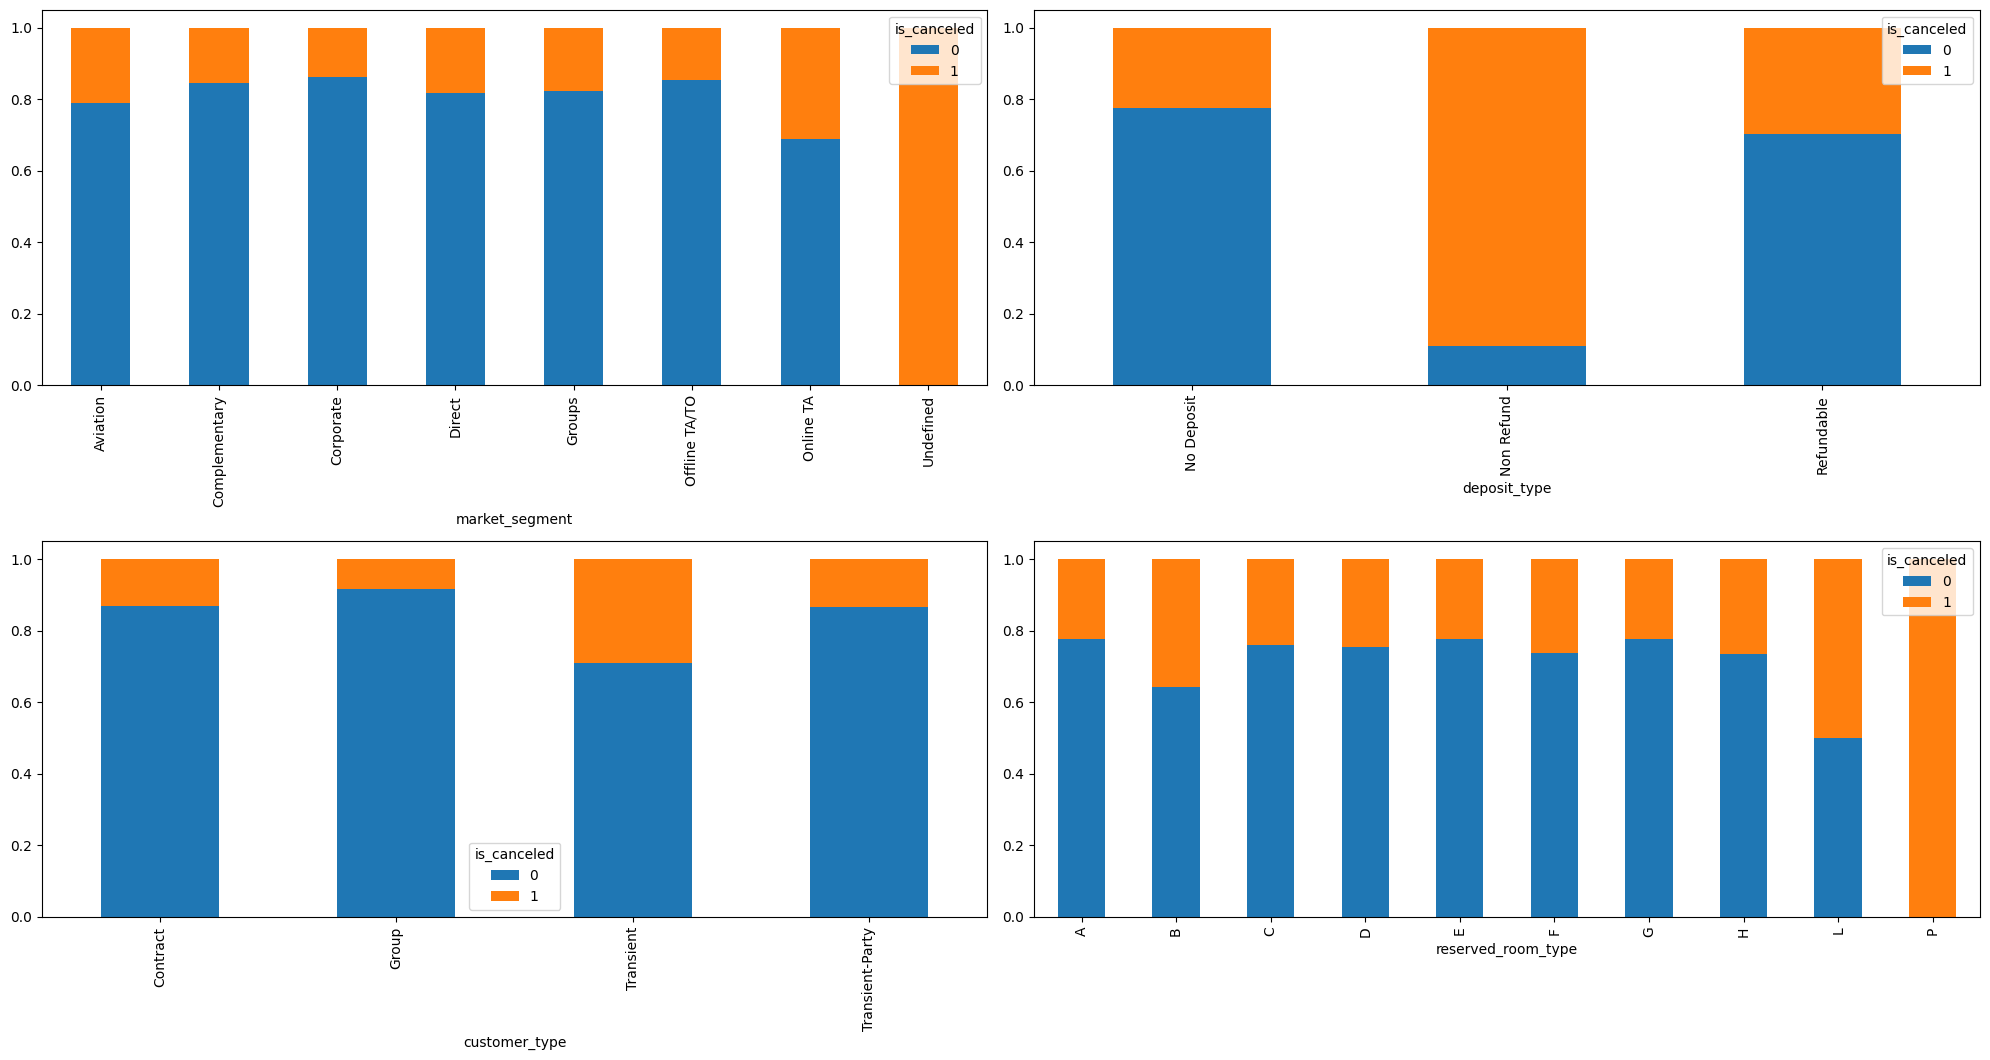

In [26]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in df.drop(columns=['is_canceled','country','previous_cancellations','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']).columns:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['is_canceled'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [27]:
for i in df.drop(columns=['is_canceled','country','previous_cancellations','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests']).columns:
    market_segment_df = df.groupby(i)['is_canceled'].value_counts(normalize=True).unstack()
    display(market_segment_df.sort_values(by=[1.0], ascending=False))

is_canceled,0,1
market_segment,,
Undefined,NaN,1.000000
Online TA,0.688465,0.311535
Aviation,0.790123,0.209877
Direct,0.816739,0.183261
Groups,0.823669,0.176331
Complementary,0.844444,0.155556
Offline TA/TO,0.852961,0.147039
Corporate,0.861386,0.138614


is_canceled,0,1
deposit_type,,
Non Refund,0.108247,0.891753
Refundable,0.702128,0.297872
No Deposit,0.775577,0.224423


is_canceled,0,1
customer_type,,
Transient,0.710700,0.289300
Transient-Party,0.865830,0.134170
Contract,0.869023,0.130977
Group,0.917012,0.082988


is_canceled,0,1
reserved_room_type,,
P,NaN,1.000000
L,0.500000,0.500000
B,0.643172,0.356828
H,0.734375,0.265625
F,0.737063,0.262937
D,0.754568,0.245432
C,0.761062,0.238938
E,0.775641,0.224359
G,0.776557,0.223443


**Insight :**<br>

- ***Market Segment:*** OTA and Undefined market segments have high cancellation rates.
- ***Deposit Type:*** Non-refundable deposits have a higher chance of cancellations.
- ***Customer Type:*** Transient customers are more prone to cancel.
- ***Reserved Room Type:*** Room types L and P have disproportionately higher cancellation rates.

Text(0.5, 0, 'Is Canceled Status')

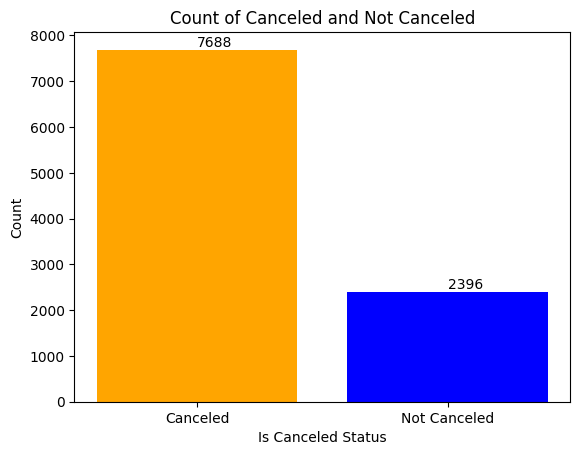

In [28]:
# Updated categories and counts
categories = ['Canceled', 'Not Canceled']
counts = df['is_canceled'].value_counts()

# Generating the updated bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, counts, color=['orange', 'blue'])

# Adding the count above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  

# Setting the title and labels
ax.set_title('Count of Canceled and Not Canceled')
ax.set_ylabel('Count')
ax.set_xlabel('Is Canceled Status')

In [29]:
# Library for normality test
import scipy.stats as stats

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

normality_test_results = {}

num_cols = len(numerical_columns)

rows = (num_cols + 2) // 3

for i, col in enumerate(numerical_columns):

    # Perform the Shapiro-Wilk Test for normality
    shapiro_test = stats.shapiro(df[col])

    # Calculate the skewness
    skewness = df[col].skew()

    # Determine the skew direction
    if skewness > 0:
        skew_direction = "Positive"
    elif skewness < 0:
        skew_direction = "Negative"
    else:
        skew_direction = "None"

    # Storing the results
    normality_test_results[col] = {
        "Shapiro-Wilk Statistic": shapiro_test.statistic,
        "Shapiro-Wilk p-value": shapiro_test.pvalue,
        "Skewness": skewness,
        "Skew Direction": skew_direction
    }

# Convert the dictionary to a DataFrame
normality_results_df = pd.DataFrame(normality_test_results).T

# Adding a column to indicate if the data is normally distributed based on p-values
normality_results_df["Normally Distributed"] = (normality_results_df["Shapiro-Wilk p-value"] > 0.05)

normality_results_df

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10084.
  res = hypotest_fun_out(*samples, **kwds)


,Shapiro-Wilk Statistic,Shapiro-Wilk p-value,Skewness,Skew Direction,Normally Distributed
previous_cancellations,0.079729,0.0,18.855827,Positive,False
booking_changes,0.629907,0.0,3.745818,Positive,False
days_in_waiting_list,0.153196,0.0,8.920584,Positive,False
required_car_parking_spaces,0.430453,0.0,3.303517,Positive,False
total_of_special_requests,0.814983,0.0,0.982334,Positive,False
is_canceled,0.527668,0.0,1.233202,Positive,False


## **Section 6. Data Preparation**

**6.1 Initialization**
- Initialization function
- Define Feature and Target

In [30]:
df.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


By adjusting the skewness values during the EDA phase, we can determine whether numerical columns should undergo **Binning** or **Scaling**. Here’s what we will do:

1. Perform **Binning** on the `previous cancellations` column, where **0** indicates no previous cancellations and **1** indicates previous cancellations. This is because the skewness value of this column is extremely high at **18.8**, indicating a highly positive skew, making it unsuitable for **Scaling**.  

2. Perform **Binning** on the `booking changes` column, where **0** indicates no booking changes and **1** indicates booking changes. The skewness value is also highly positive at **3.7**, making it unsuitable for **Scaling**.  

3. Perform **Binning** on the `days in waiting list` column, where **0** indicates not on the waiting list and **1** indicates being on the waiting list. This column also shows a highly positive skew with a value of **8.9**.  

4. Perform **Binning** on the `required_car_parking_spaces` column, where **0** indicates no parking space requested and **1** indicates parking space requested. The skewness value here is **3.3**, indicating a highly positive skew, and there are extreme outliers in this column, making it unsuitable for **Scaling**.  

5. Perform **Scaling** on the `total_of_special_requests` column because it shows only a slight skewness of **0.9** and does not contain extreme outliers in its values. Using **MinMax Scaling** because the values haven't been extreme outliers.

Now let’s perform **feature encoding** for the categorical features we have. Here’s what we’ll do:

1. **Transform the `country` column using Binary Encoding:**  
   The `country` column contains many unique values and has no inherent order (it’s not ordinal). If we use **One-Hot Encoding**, it will create too many new features, and using **Ordinal/Label Encoding** might not produce meaningful results. Therefore, **Binary Encoding** is a more suitable choice to efficiently represent this feature without introducing unnecessary complexity.

2. **Transform the `market_segment` column using One-Hot Encoding:**  
   This column contains different market segment types (e.g., Corporate, Direct, Online, etc.). These segment types do not have any clear order or numerical relationship, making **One-Hot Encoding** the most appropriate choice. Each segment will be converted into a binary dummy variable that can be processed by machine learning models without implying any incorrect ordinal meaning.

3. **Transform the `deposit_type` column using One-Hot Encoding:**  
   The `deposit_type` column contains information about deposit types (e.g., No Deposit, Non-Refund, and Refundable). Although there are only three categories, there is no numerical order between them. **One-Hot Encoding** is the better choice because it accurately represents each deposit type without introducing a misleading ordinal relationship.

4. **Transform the `customer_type` column using One-Hot Encoding:**  
   This column indicates customer types (e.g., Transient, Contract, Group). Similar to `market_segment`, it has no inherent order or numerical meaning. Therefore, **One-Hot Encoding** is the appropriate choice, allowing each customer type to be represented without suggesting any ordinal or numerical relationship.

5. **Transform the `reserved_room_type` column using One-Hot Encoding:**  
   This column represents the type of room reserved (e.g., A, B, C, etc.). Since these categories have no clear numerical order and each room type has a distinct meaning, **One-Hot Encoding** will convert each room type into a binary column, ensuring that the model does not assume any ordinal relationship between them.

In [31]:
# define feature and target

feature = df_seen.drop('is_canceled', axis=1)
target = df_seen['is_canceled']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2,
                                                    random_state=42, stratify=target)
print(X_train.shape)
print(y_train.shape)

(6453, 10)
(6453,)


**6.2 Data Transformation (Feature Engineering)**

In [33]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.pipeline import Pipeline

# binning
df['previous_cancellations'] = df['previous_cancellations'].apply(lambda x: 0 if x == 0 else 1)
df['booking_changes'] = df['booking_changes'].apply(lambda x: 0 if x == 0 else 1)
df['days_in_waiting_list'] = df['days_in_waiting_list'].apply(lambda x: 0 if x == 0 else 1)
df['required_car_parking_spaces'] = df['required_car_parking_spaces'].apply(lambda x: 0 if x == 0 else 1)

# Create transformer object
transformer = ColumnTransformer(
    transformers=[
        ('scaling_minmax', MinMaxScaler(), ['total_of_special_requests']),
        ('encoding_ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']),
        ('binary', ce.BinaryEncoder(), ['country'])
    ], 
    remainder='passthrough', 
    verbose_feature_names_out=False
)

**6.3 Overview**

In [34]:
# transformer 
transformer.fit(X_train)

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling_minmax', MinMaxScaler(),
                                 ['total_of_special_requests']),
                                ('encoding_ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['market_segment', 'deposit_type',
                                  'customer_type', 'reserved_room_type']),
                                ('binary', BinaryEncoder(), ['country'])],
                  verbose_feature_names_out=False)

In [35]:
X_train_pre = transformer.transform(X_train)
X_test_pre = transformer.transform(X_test)

# DataFrame
X_train_pre = pd.DataFrame(X_train_pre, columns=transformer.get_feature_names_out())
X_test_pre = pd.DataFrame(X_test_pre, columns=transformer.get_feature_names_out())

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [36]:
X_train_pre

,total_of_special_requests,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,...,country_2,country_3,country_4,country_5,country_6,country_7,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces
0,0.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,0.6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6449,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
6450,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
6451,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


## **Section 7. Model Development**

**7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

In [37]:
# %pip install xgboost

In [ ]:
# %pip install lightgbm

In [40]:
# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

**7.2 Developing the Model Pipeline**

In [50]:
# Create base pipeline

base_clf = Pipeline(steps=[
    ('FeatureEngineering', transformer),
    ('Classifier', None)
])

base_bal_clf = Pipeline(steps=[
    ('FeatureEngineering', transformer),
    ('Resampling', SMOTE()),
    ('Classifier', None)
])

In [51]:
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = lgb.LGBMClassifier(random_state=42)

list_model = [logreg, knn, dt, rf, xgb, lgbm]

**7.3 Model Benchmarking (Comparing model base performance)**

In [52]:
# without resample

benchmark = GridSearchCV(
    estimator=base_clf,
    param_grid={'Classifier': list_model},
    scoring=['precision', 'recall', 'roc_auc'],
    refit='roc_auc', # if scoring just 1 without refit
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1
)

In [53]:
# benchmark process
benchmark.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[LightGBM] [Info] Number of positive: 1238, number of negative: 3924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 140
[LightGBM] [Info] Number of data points in the train set: 5162, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239830 -> initscore=-1.153614
[LightGBM] [Info] Start training from score -1.153614
[LightGBM] [Info] Number of positive: 1237, number of negative: 3925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 5162, number of used features: 30
[LightGBM] [Info] [binary:

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Number of positive: 1547, number of negative: 4906
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 6453, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239733 -> initscore=-1.154141
[LightGBM] [Info] Start training from score -1.154141


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_minmax',
                                                                         MinMaxScaler(),
                                                                         ['total_of_special_requests']),
                                                                        ('encoding_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'custome...
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...),
                                        LGBMClassifier(random_state=42)]},
             refit='roc_auc', return_train_score=True,
             scoring=['precision', 'recall', 'roc_auc'], verbose=1)

In [54]:
benchmark.best_score_

np.float64(0.816795972675082)

In [55]:
pd.DataFrame(benchmark.cv_results_).T

,0,1,2,3,4,5
mean_fit_time,0.082924,0.069831,0.087039,0.641886,0.155446,0.199669
std_fit_time,0.012168,0.019929,0.046938,0.045415,0.026877,0.019561
mean_score_time,0.024441,0.215594,0.040388,0.081993,0.049914,0.051816
std_score_time,0.0049,0.116759,0.021611,0.00565,0.0092,0.004662
param_Classifier,LogisticRegression(random_state=42),KNeighborsClassifier(),DecisionTreeClassifier(random_state=42),RandomForestClassifier(random_state=42),"XGBClassifier(base_score=None, booster=None, c...",LGBMClassifier(random_state=42)
params,{'Classifier': LogisticRegression(random_state...,{'Classifier': KNeighborsClassifier()},{'Classifier': DecisionTreeClassifier(random_s...,{'Classifier': RandomForestClassifier(random_s...,"{'Classifier': XGBClassifier(base_score=None, ...",{'Classifier': LGBMClassifier(random_state=42)}
split0_test_precision,0.612676,0.416667,0.296029,0.382609,0.487179,0.536145
split1_test_precision,0.556338,0.439815,0.298932,0.389831,0.517949,0.527778
split2_test_precision,0.609272,0.454976,0.343434,0.388,0.529126,0.549451
split3_test_precision,0.539474,0.411523,0.328859,0.372624,0.525424,0.526066


In [56]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# with resample

benchmark_resample = GridSearchCV(
    estimator=base_bal_clf,
    param_grid={'Resampling' : [SMOTE(random_state=42), 
                              RandomOverSampler(random_state=42),
                              RandomUnderSampler(random_state=42),
                              NearMiss(version=1)],
                'Classifier': list_model},
    scoring = ['precision', 'recall', 'roc_auc'],
    refit='roc_auc',
    cv=StratifiedKFold(shuffle=True, random_state=42),
    return_train_score=True,
    verbose=1,
)

In [57]:
benchmark_resample.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[LightGBM] [Info] Number of positive: 3924, number of negative: 3924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1701
[LightGBM] [Info] Number of data points in the train set: 7848, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3925, number of negative: 3925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1889
[LightGBM] [Info] Number of data points in the train set: 7850, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Number of positive: 3924, number of negative: 3924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 163
[LightGBM] [Info] Number of data points in the train set: 7848, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 3925, number of negative: 3925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 157
[LightGBM] [Info] Number of data points in the train set: 7850, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[L

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Total Bins 112
[LightGBM] [Info] Number of data points in the train set: 2476, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1237, number of negative: 1237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 2474, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1237, number of negative: 1237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[L

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Number of positive: 1237, number of negative: 1237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 95
[LightGBM] [Info] Number of data points in the train set: 2474, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 1237, number of negative: 1237
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 97
[LightGBM] [Info] Number of data points in the train set: 2474, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[Lig

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[LightGBM] [Info] Number of positive: 4906, number of negative: 4906
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2416
[LightGBM] [Info] Number of data points in the train set: 9812, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_minmax',
                                                                         MinMaxScaler(),
                                                                         ['total_of_special_requests']),
                                                                        ('encoding_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'custome...
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...),
                                        LGBMClassifier(random_state=42)],
                         'Resampling': [SMOTE(random_state=42),
                                        RandomOverSampler(random_state=42),
                                        RandomUnderSampler(random_state=42),
                                        NearMiss()]},
             refit='roc_auc', return_train_score=True,
             scoring=['precision', 'recall', 'roc_auc'], verbose=1)

In [58]:
pd.DataFrame(benchmark_resample.cv_results_).sort_values('rank_test_roc_auc')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Classifier,param_Resampling,params,split0_test_precision,split1_test_precision,split2_test_precision,...,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc,split0_train_roc_auc,split1_train_roc_auc,split2_train_roc_auc,split3_train_roc_auc,split4_train_roc_auc,mean_train_roc_auc,std_train_roc_auc
20,0.227920,0.024123,0.038473,0.002587,LGBMClassifier(random_state=42),SMOTE(random_state=42),{'Classifier': LGBMClassifier(random_state=42)...,0.489437,0.507752,0.510949,...,0.819656,0.008905,1,0.903971,0.901481,0.900348,0.903300,0.900494,0.901919,0.001470
21,0.134691,0.013490,0.035486,0.003101,LGBMClassifier(random_state=42),RandomOverSampler(random_state=42),{'Classifier': LGBMClassifier(random_state=42)...,0.441230,0.448276,0.431159,...,0.814480,0.008650,2,0.902946,0.903010,0.903794,0.907297,0.902971,0.904004,0.001677
16,0.232270,0.013669,0.037263,0.003041,"XGBClassifier(base_score=None, booster=None, c...",SMOTE(random_state=42),"{'Classifier': XGBClassifier(base_score=None, ...",0.449393,0.525210,0.507692,...,0.814407,0.009874,3,0.917682,0.912041,0.913744,0.915788,0.912965,0.914444,0.002037
22,0.108376,0.011905,0.036518,0.005909,LGBMClassifier(random_state=42),RandomUnderSampler(random_state=42),{'Classifier': LGBMClassifier(random_state=42)...,0.432566,0.437063,0.430017,...,0.810937,0.005712,4,0.882846,0.881128,0.879949,0.877685,0.875409,0.879403,0.002609
18,0.113379,0.004418,0.038510,0.010436,"XGBClassifier(base_score=None, booster=None, c...",RandomUnderSampler(random_state=42),"{'Classifier': XGBClassifier(base_score=None, ...",0.416118,0.444846,0.418848,...,0.809276,0.008307,5,0.890928,0.887072,0.885831,0.889497,0.885095,0.887685,0.002205
17,0.130106,0.008585,0.034175,0.001569,"XGBClassifier(base_score=None, booster=None, c...",RandomOverSampler(random_state=42),"{'Classifier': XGBClassifier(base_score=None, ...",0.428839,0.437500,0.439163,...,0.808240,0.010924,6,0.921458,0.916617,0.917865,0.921593,0.915550,0.918617,0.002486
1,0.081842,0.018982,0.025978,0.006769,LogisticRegression(random_state=42),RandomOverSampler(random_state=42),{'Classifier': LogisticRegression(random_state...,0.412371,0.417563,0.429577,...,0.803990,0.011798,7,0.807559,0.814864,0.809857,0.807374,0.801456,0.808222,0.004330
2,0.056196,0.005934,0.030456,0.006092,LogisticRegression(random_state=42),RandomUnderSampler(random_state=42),{'Classifier': LogisticRegression(random_state...,0.409917,0.414336,0.433393,...,0.803153,0.013116,8,0.804969,0.812995,0.809657,0.803233,0.800420,0.806255,0.004513
0,0.122452,0.025311,0.018218,0.002791,LogisticRegression(random_state=42),SMOTE(random_state=42),{'Classifier': LogisticRegression(random_state...,0.406838,0.423853,0.439781,...,0.803051,0.012845,9,0.805962,0.813589,0.809216,0.806953,0.799703,0.807085,0.004530
14,0.313295,0.012020,0.054466,0.003613,RandomForestClassifier(random_state=42),RandomUnderSampler(random_state=42),{'Classifier': RandomForestClassifier(random_s...,0.404643,0.418312,0.401681,...,0.761821,0.006712,10,0.936838,0.930506,0.933367,0.935901,0.934361,0.934195,0.002201


In [64]:
# save model

import pickle

best_model_without_resample = benchmark.best_estimator_
best_model_with_resample = benchmark_resample.best_estimator_

pickle.dump(best_model_with_resample, open('LGBM-v1-0819.sav', 'wb')) # wb = write binary
pickle.dump(best_model_without_resample, open('LGBM_v1_0816.sav', 'wb'))

**7.4 Tune Model**

In [78]:
model = pickle.load(open('LGBM-v1-0819.sav', 'rb')) # rb = read binary

In [79]:
model

Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling_minmax',
                                                  MinMaxScaler(),
                                                  ['total_of_special_requests']),
                                                 ('encoding_ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['market_segment',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reserved_room_type']),
                                                 ('binary', BinaryEncoder(),
                                                  ['country'])],
                                   verbose_feature_names_out=False)),
                ('Resampling', SMOTE(random_state=42)),
                ('Classifier', LGBMClassifier(random_state=42))])

In [98]:
# Model Improvement 1 - LGBM Model

# Focus on the most impactful hyperparameters on model performance
hyperparam_space = {
    'Classifier__max_bin': [255, 300],  
    'Classifier__num_leaves': [31, 41],  
    'Classifier__min_data_in_leaf': [20, 30],  
    'Classifier__num_iterations': [100, 150],  
    'Classifier__learning_rate': [0.1, 0.05],  
    'Classifier__random_state': [42]  
}

default hyperparameter LGBM => `max_bin` = 255, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, `learning_rate` = 0.1

In [99]:
tunning_lgb = GridSearchCV(
    estimator=model, 
    param_grid=hyperparam_space,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    verbose=2,
    n_jobs=-1
)

In [100]:
tunning_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 4906, number of negative: 4906
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2010
[LightGBM] [Info] Number of data points in the train set: 9812, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_minmax',
                                                                         MinMaxScaler(),
                                                                         ['total_of_special_requests']),
                                                                        ('encoding_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'custome...
                                       ('Resampling', SMOTE(random_state=42)),
                                       ('Classifier',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'Classifier__learning_rate': [0.1, 0.05],
                         'Classifier__max_bin': [255, 300],
                         'Classifier__min_data_in_leaf': [20, 30],
                         'Classifier__num_iterations': [100, 150],
                         'Classifier__num_leaves': [31, 41],
                         'Classifier__random_state': [42]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [101]:
tunning_lgb.best_score_

np.float64(0.8264038554888911)

In [102]:
tunning_lgb.best_params_

{'Classifier__learning_rate': 0.05,
 'Classifier__max_bin': 300,
 'Classifier__min_data_in_leaf': 20,
 'Classifier__num_iterations': 100,
 'Classifier__num_leaves': 31,
 'Classifier__random_state': 42}

Best Hyperparameter LGBM Classifier from Gridsearch result => `max_bin` = 300, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, `learning_rate` = 0.05

In [103]:
# Model Improvement 2 - LGBM Model

# Focus on the most impactful hyperparameters on model performance
hyperparam_space = {
    'Classifier__max_bin': [300, 325],  
    'Classifier__num_leaves': [31, 21],  
    'Classifier__min_data_in_leaf': [20, 15],  
    'Classifier__num_iterations': [100, 75],  
    'Classifier__learning_rate': [0.05, 0.025],  
    'Classifier__random_state': [42]  
}

In [104]:
tunning_lgb2 = GridSearchCV(
    estimator=model, 
    param_grid=hyperparam_space,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    verbose=2,
    n_jobs=-1
)

In [105]:
tunning_lgb2.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 4906, number of negative: 4906
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1999
[LightGBM] [Info] Number of data points in the train set: 9812, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_minmax',
                                                                         MinMaxScaler(),
                                                                         ['total_of_special_requests']),
                                                                        ('encoding_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'custome...
                                       ('Resampling', SMOTE(random_state=42)),
                                       ('Classifier',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'Classifier__learning_rate': [0.05, 0.025],
                         'Classifier__max_bin': [300, 325],
                         'Classifier__min_data_in_leaf': [20, 15],
                         'Classifier__num_iterations': [100, 75],
                         'Classifier__num_leaves': [31, 21],
                         'Classifier__random_state': [42]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [113]:
tunning_lgb2.best_score_

np.float64(0.8296908159422962)

In [114]:
tunning_lgb2.best_params_

{'Classifier__learning_rate': 0.05,
 'Classifier__max_bin': 325,
 'Classifier__min_data_in_leaf': 15,
 'Classifier__num_iterations': 100,
 'Classifier__num_leaves': 21,
 'Classifier__random_state': 42}

In [120]:
# Model Improvement 3 - LGBM Model

# Focus on the most impactful hyperparameters on model performance
hyperparam_space = {
    'Classifier__max_bin': [325, 350],  
    'Classifier__num_leaves': [21, 25],  
    'Classifier__min_data_in_leaf': [15, 25],  
    'Classifier__num_iterations': [100, 125],  
    'Classifier__learning_rate': [0.05, 0.075],  
    'Classifier__random_state': [42]  
}

In [121]:
tunning_lgb3 = GridSearchCV(
    estimator=model, 
    param_grid=hyperparam_space,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    return_train_score=True,
    verbose=2,
    n_jobs=-1
)

In [122]:
tunning_lgb3.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 4906, number of negative: 4906
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1999
[LightGBM] [Info] Number of data points in the train set: 9812, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('FeatureEngineering',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaling_minmax',
                                                                         MinMaxScaler(),
                                                                         ['total_of_special_requests']),
                                                                        ('encoding_ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['market_segment',
                                                                          'deposit_type',
                                                                          'custome...
                                       ('Resampling', SMOTE(random_state=42)),
                                       ('Classifier',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'Classifier__learning_rate': [0.05, 0.075],
                         'Classifier__max_bin': [325, 350],
                         'Classifier__min_data_in_leaf': [15, 25],
                         'Classifier__num_iterations': [100, 125],
                         'Classifier__num_leaves': [21, 25],
                         'Classifier__random_state': [42]},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [157]:
best_score = tunning_lgb3.best_score_
print(f"Light Gradient Boosting Machine Model after Tunning: {best_score:.2f}")

Light Gradient Boosting Machine Model after Tunning: 0.83


In [161]:
tunning_lgb3.best_params_

{'Classifier__learning_rate': 0.05,
 'Classifier__max_bin': 325,
 'Classifier__min_data_in_leaf': 15,
 'Classifier__num_iterations': 100,
 'Classifier__num_leaves': 21,
 'Classifier__random_state': 42}

In [162]:
# Update best model
best_model = tunning_lgb3.best_estimator_

**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

- Evaluate model on data testing

In [128]:
from sklearn.metrics import classification_report

y_test_score = benchmark_resample.best_estimator_.predict(X_test)
y_test_score_prob = benchmark_resample.best_estimator_.predict_proba(X_test)
y_train_score_prob = benchmark_resample.best_estimator_.predict_proba(X_train)

print("Model Light Gradient Boosting Machine (Before Tunning) - on Testing")
print(classification_report(y_test, y_test_score))
print()
print("ROC-AUC Score (Training): ", roc_auc_score(y_train, y_train_score_prob[:,1]))
print("ROC-AUC Score (Test): ", roc_auc_score(y_test, y_test_score_prob[:,1]))

Model Light Gradient Boosting Machine (Before Tunning) - on Testing
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1227
           1       0.54      0.44      0.48       387

    accuracy                           0.78      1614
   macro avg       0.69      0.66      0.67      1614
weighted avg       0.76      0.78      0.77      1614


ROC-AUC Score (Training):  0.8934115212142117
ROC-AUC Score (Test):  0.8338850876805048


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


- Residual Analysis

In [135]:
best_model = tunning_lgb3.best_estimator_

In [153]:
from deepchecks.tabular.checks import WeakSegmentsPerformance
from deepchecks.tabular import Dataset

# # Define the Dataset object
# dataset = Dataset(
#     df, 
#     label='is_canceled', 
#     cat_features=['country', 'market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
# )

# # Define the WeakSegmentsPerformance check
# check = WeakSegmentsPerformance(
#     alternative_scorer='roc_auc',  # Use 'roc_auc' directly without a dictionary
#     columns=['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 
#              'required_car_parking_spaces', 'total_of_special_requests']
# )

# # Run the check
# checking_result = check.run(dataset, best_model)
# checking_result.show()

In [154]:
# checking_result.value['weak_segments_list']

In [155]:
# checking_result.show(False)

- Learning Curve Inspection

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 401, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 802, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warn

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 3030, number of negative: 3030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1685
[LightGBM] [Info] Number of data points in the train set: 6060, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 3924, number of negative: 3924
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1853
[LightGBM] [Info] Number of data points in the train set: 7848, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2172, number of negative: 2172
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1282
[LightGBM] [Info] Number of data points in the train set: 4344, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 3031, number of negative: 3031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1631
[LightGBM] [Info] Number of data points in the train set: 6062, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 3925, number of negative: 3925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1826
[LightGBM] [Info] Number of data points in the train set: 7850, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 403, number of negative: 403
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 806, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warn

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 3031, number of negative: 3031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1604
[LightGBM] [Info] Number of data points in the train set: 6062, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 3925, number of negative: 3925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1787
[LightGBM] [Info] Number of data points in the train set: 7850, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1, 3] during transform. These unknown categories will be encoded as all zeros

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 1286, number of negative: 1286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 2572, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [W

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 3030, number of negative: 3030
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1680
[LightGBM] [Info] Number of data points in the train set: 6060, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 3925, number of negative: 3925
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1866
[LightGBM] [Info] Number of data points in the train set: 7850, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 1286, number of negative: 1286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 2572, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [W

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 2163, number of negative: 2163
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1220
[LightGBM] [Info] Number of data points in the train set: 4326, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 3065, number of negative: 3065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1726
[LightGBM] [Info] Number of data points in the train set: 6130, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



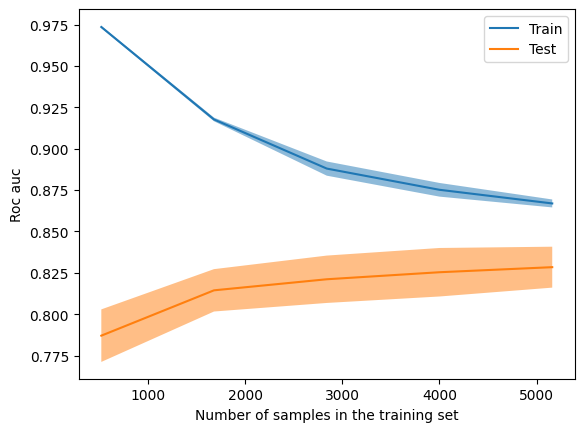

In [136]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(best_model, X_train, y_train, scoring='roc_auc')

**7.6 Model Calibration (Classification Only)**

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


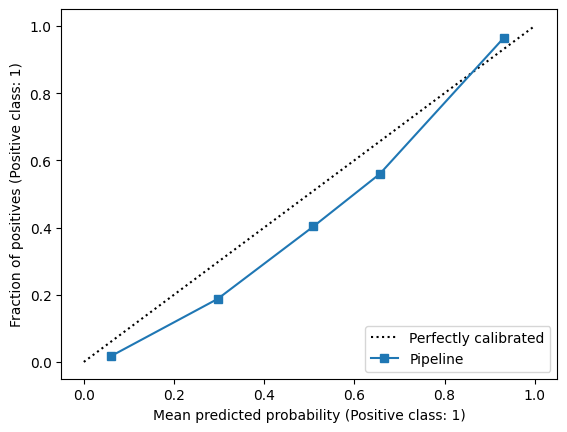

In [137]:
from sklearn.calibration import CalibrationDisplay, CalibratedClassifierCV

CalibrationDisplay.from_estimator(best_model, X_train, y_train)

In [138]:
clf_calibrated = CalibratedClassifierCV(best_model, cv='prefit')

In [139]:
clf_calibrated.fit(X_train, y_train)

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


CalibratedClassifierCV(cv='prefit',
                       estimator=Pipeline(steps=[('FeatureEngineering',
                                                  ColumnTransformer(remainder='passthrough',
                                                                    transformers=[('scaling_minmax',
                                                                                   MinMaxScaler(),
                                                                                   ['total_of_special_requests']),
                                                                                  ('encoding_ohe',
                                                                                   OneHotEncoder(drop='first',
                                                                                                 handle_unknown='ignore'),
                                                                                   ['market_segment',
                                                                                    'deposit_type',
                                                                                    'customer_type',
                                                                                    'reserved_room_type']),
                                                                                  ('binary',
                                                                                   BinaryEncoder(),
                                                                                   ['country'])],
                                                                    verbose_feature_names_out=False)),
                                                 ('Resampling',
                                                  SMOTE(random_state=42)),
                                                 ('Classifier',
                                                  LGBMClassifier(learning_rate=0.05,
                                                                 max_bin=325,
                                                                 min_data_in_leaf=15,
                                                                 num_iterations=100,
                                                                 num_leaves=21,
                                                                 random_state=42))]))

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


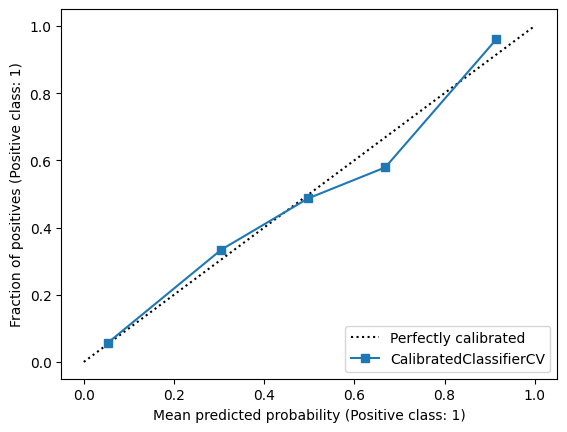

In [140]:
# Classifier after calibration
CalibrationDisplay.from_estimator(clf_calibrated, X_train, y_train)

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

- Feature Importance (Tree Based Model) -> LightGBM Model

In [141]:
model = clf_calibrated.estimator.named_steps['Classifier'] # Get the model
preprocessing = clf_calibrated.estimator.named_steps['FeatureEngineering'] # Get preprocessor

In [142]:
feature_name = preprocessing.get_feature_names_out()
score = model.feature_importances_

In [143]:
feat_imp = pd.DataFrame({
    'feature': feature_name,
    'importance': score
}).sort_values('importance', ascending=False)

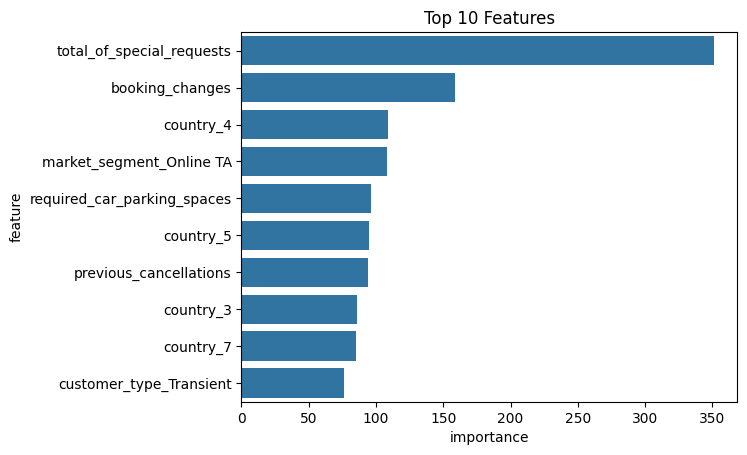

In [145]:
result = pd.DataFrame({'feature': feature_name, 'importance': score}).sort_values('importance', ascending=False).head(10)
sns.barplot(result, x='importance', y='feature')
plt.title("Top 10 Features")
plt.show()

- SHAP Value identification

In [146]:
import shap

In [147]:
shap.initjs()

In [148]:
model = clf_calibrated.estimator.named_steps['Classifier']
preprocessor = clf_calibrated.estimator.named_steps['FeatureEngineering']

X_train_pre = preprocessor.transform(X_train)
X_train_pre_df = pd.DataFrame(X_train, columns=preprocessor.get_feature_names_out())

X_test_pre = preprocessor.transform(X_test)
X_test_pre_df = pd.DataFrame(X_test_pre, columns=preprocessor.get_feature_names_out())

c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros



In [149]:
explainer = shap.TreeExplainer(model=model,
                                 data=X_train_pre_df,
                                 model_output="probability",
                                 feature_names=preprocessor.get_feature_names_out())

In [150]:
shap_values = explainer.shap_values(X_train_pre)

 96%|=================== | 6216/6453 [00:20<00:00]       

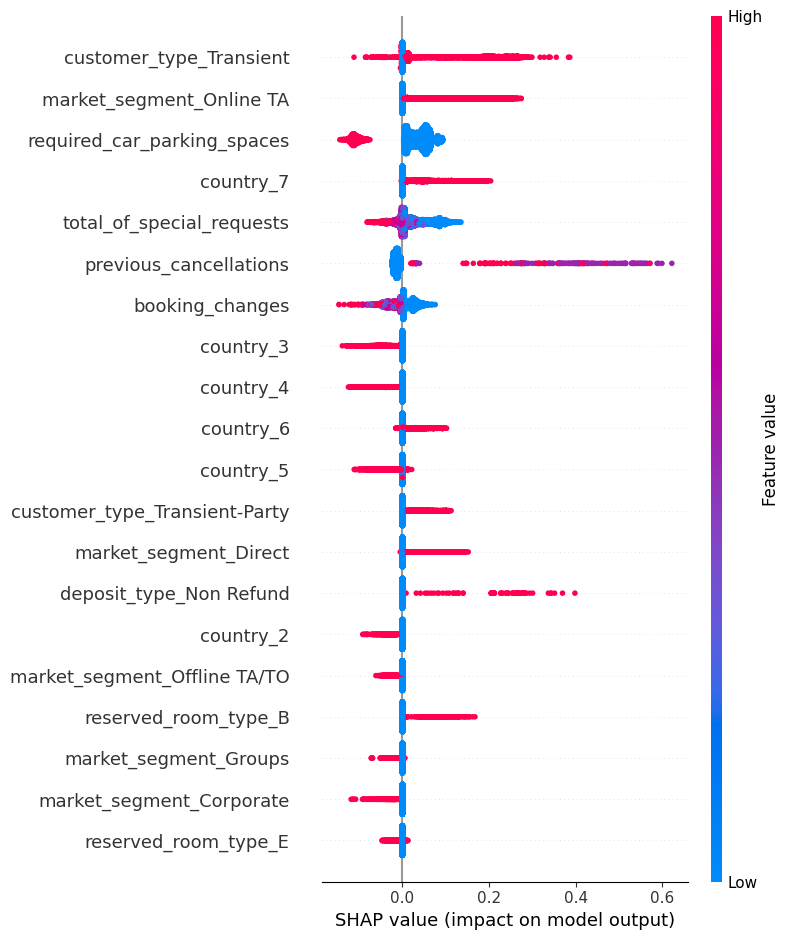

In [151]:
shap.summary_plot(shap_values, X_train_pre, feature_names=preprocessor.get_feature_names_out())

## **Section 8. Model Deployment**

In [163]:
best_model.fit(feature, target)
pickle.dump(best_model, open("LGBM-final-clf_calibrated-083.sav", 'wb'))

[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Info] Number of positive: 6133, number of negative: 6133
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2322
[LightGBM] [Info] Number of data points in the train set: 12266, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\user\anaconda3\envs\jcds0412_new\Lib\site-packages\lightgbm\engine.py:204: UserWarning:

Found `num_iterations` in params. Will use it instead of argument



## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)